In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [6]:
from hcaptcha_solver import Captcha_Solver

cs = Captcha_Solver()

Initializing model handler...
Loaded 7 models


In [1]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

Launching hCaptcha...
Launched hCaptcha
Switched to Captcha
Captcha V2 found, refreshing
Captcha V1 found
Got Captcha data
Found Captcha task: tree


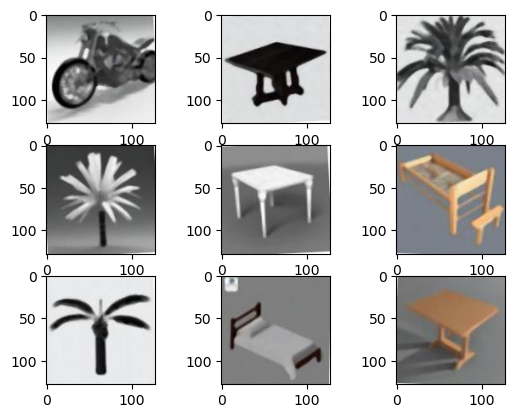

Predicting 9 images...
Predictions: [0.016398987, 0.048231646, 0.99284726, 0.97127783, 0.00036925366, 0.10403098, 0.9371358, 0.05534187, 0.008533758]
Correct Images: [False, False, True, True, False, False, True, False, False]
Submitted captcha


NameError: name 'time' is not defined

In [8]:
cs.solve_captcha(wd)

{'height': 636, 'width': 520} {'x': 89, 'y': 11} True


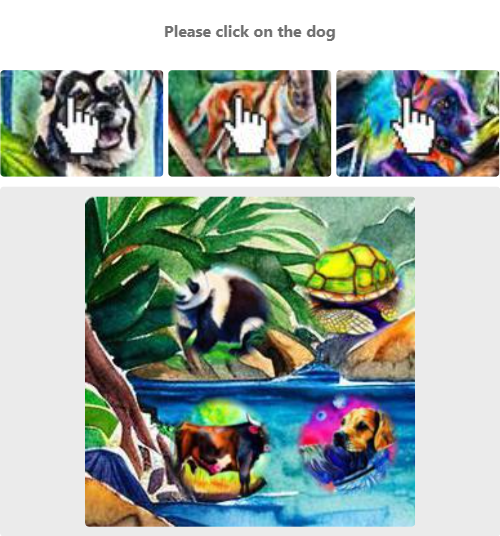

In [50]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from PIL import Image
from io import BytesIO
import PIL.Image

wd.switch_to.default_content()
challenge = wd.find_element(By.XPATH, "//iframe[contains(@src,'hcaptcha') and contains(@src,'challenge')]")
challenge_loc = challenge.location
print(challenge.size, challenge_loc, challenge.is_displayed())

wd.switch_to.frame(challenge)
canvas = wd.find_element(By.XPATH, "//canvas")
# Capture a screenshot of the canvas
canvas_screenshot = canvas.screenshot_as_png

# Create a PIL image from the screenshot data
image = PIL.Image.open(BytesIO(canvas_screenshot))

display(image)